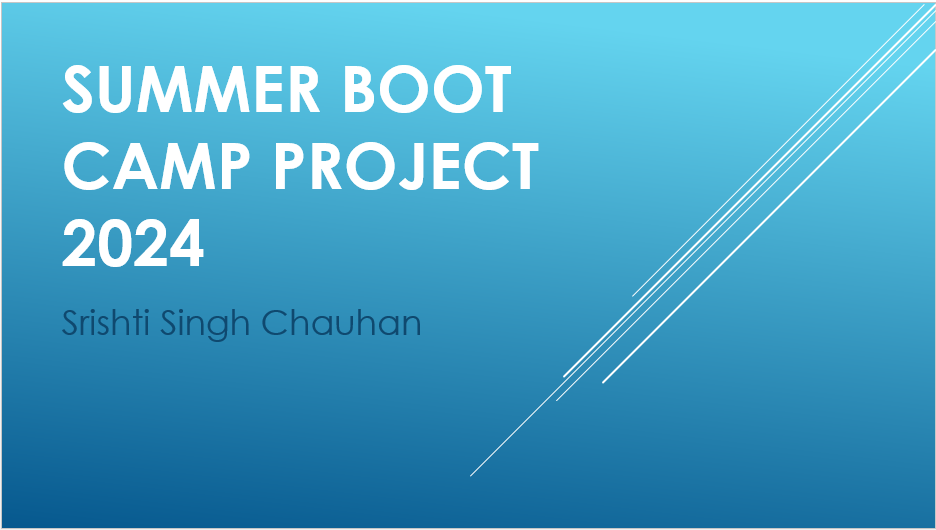

# INDEX		
**S No.** **Topic**<br>
1. Cover Page
2. Index
3. List of Figures
4. Problem Description
5. Data Dictionary
6. Basic EDA
7. Application and Enrollment Analysis
8. Academic Excellence
9. Student Demographics
10. Cost and Spending
11. Faculty Qualifications
12. Student-Faculty Interaction
13. Alumni Engagement
14. Graduation Rates
15. Overall Insights

# List of Figures
1. Boxplot for checking the outliers
2. Boxplot of Numerical Columns after the removal of outliers
3. Scatter plot of Top 10% vs Top 25%
4. Distribution of Instructional Expenditure per Student
5. Scatter plot of Ph.D. percentage vs Graduation Rate
6. Scatter plot of Student/Faculty Ratio vs Graduation Rate
7. Scatter plot of % Alumni who donate vs Graduation Rate
8. Scatter plot of Instructional expenditure per student vs Graduation Rate
9. Factors Correlated with Graduation Rate

# Problem Description

## Data
The objective of this analysis is to gain insights into the characteristics of colleges and answer key questions related to the educational landscape. By understanding the data, we aim to inform strategies for improving the quality of education and enhancing the overall college experience. The analysis will provide valuable insights and recommendations for stakeholders in the education sector. <br>

## Data Description
* **Names**: Names of various university and colleges<br>
* **Apps**: Number of applications received<br>
* **Accept**: Number of applications accepted<br>
* **Enroll**: Number of new students enrolled<br>
* **Top10perc**: Percentage of new students from top 10% of Higher Secondary class<br>
* **Top25perc**: Percentage of new students from top 25% of Higher Secondary class<br>
* **F.Undergrad**: Number of full-time undergraduate students<br>
* **P.Undergrad**: Number of part-time undergraduate students<br>
* **Outstate**: Number of students for whom the particular college or university is Out-of-state tuition<br>
* **Room.Board**: Cost of Room and board<br>
* **Books**: Estimated book costs for a student<br>
* **Personal**: Estimated personal spending for a student<br>
* **PhD**: Percentage of faculties with Ph.D.’s<br>
* **Terminal**: Percentage of faculties with terminal degree<br>
* **S.F.Ratio**: Student/faculty ratio<br>
* **perc.alumni**: Percentage of alumni who donate<br>
* **Expend**: The Instructional expenditure per student<br>
* **Grad.Rate**: Graduation rate<br>

# Importing the necessary libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the provided datasets

In [58]:
df = pd.read_csv("1-Education_Post_12th_Standard_New.csv")

# Basic Description (EDA):

**Display the top 5 rows**

In [59]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660.0,1232,721.0,23.0,52,2885,537,7440,3300,450,2200.0,70,78,18.1,12,7041,60
1,Adelphi University,2186.0,1924,512.0,16.0,29,2683,1227,12280,6450,750,1500.0,29,30,?,16,10527,56
2,Adrian College,1428.0,1097,336.0,22.0,50,1036,99,11250,3750,400,1165.0,53,66,12.9,30,8735,54
3,Agnes Scott College,417.0,349,NaN,60.0,89,510,63,12960,5450,450,875.0,92,97,7.7,37,19016,59
4,Alaska Pacific University,193.0,146,55.0,16.0,44,249,869,7560,4120,800,1500.0,76,72,11.9,2,10922,15


**Based on the above result we can observe that the following columns:**

* **Enroll** have null value as **'NaN'** on index **3**.
* **S.F.Ratio** have incorrect value as **'?'** on index **1**.

**Display the last 5 rows**

In [60]:
df.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197.0,1515,543.0,4.0,26,3089,2029,6797,3900,500,1200.0,60,60,21,14,4469,40
773,Xavier University,1959.0,1805,695.0,24.0,47,2849,1107,11520,4960,600,1250.0,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097.0,1915,695.0,34.0,61,2793,166,6900,4200,617,781.0,67,75,14.4,20,8323,49
775,Yale University,10705.0,2453,1317.0,95.0,99,5217,83,19840,6510,630,2115.0,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989.0,1855,691.0,28.0,63,2988,1726,4990,3560,500,1250.0,75,75,18.1,28,4509,99


**Check the shape of dataset**

In [61]:
df.shape

(777, 18)

It shows that the dataset have **777 rows** and **18 columns**.

**Check the datatypes of each feature.**

In [62]:
df.dtypes

Names           object
Apps           float64
Accept           int64
Enroll         float64
Top10perc      float64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal       float64
PhD              int64
Terminal         int64
S.F.Ratio       object
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

The data type of **S.F.Ratio is object type which is incorrect**. It should be of float type as it contains numeric data.
This shows that the column might contain some string values which can hinder the analysis of data.

**Check the Statistical summary** 

In [63]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,perc.alumni,Expend,Grad.Rate
count,775.000000,777.000000,775.000000,773.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,774.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3007.592258,2018.804376,780.961290,27.620957,55.796654,3699.907336,855.298584,10440.669241,4357.526384,547.875161,1601.507752,72.660232,79.702703,22.743887,9660.171171,65.46332
std,3873.414660,2451.113971,930.077779,17.645470,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,167.426237,7369.594038,16.328155,14.722359,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,0.000000,50.000000,8.000000,24.000000,0.000000,3186.000000,10.00000
25%,778.000000,604.000000,242.500000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,465.000000,855.000000,62.000000,71.000000,13.000000,6751.000000,53.00000
50%,1561.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,21.000000,8377.000000,65.00000
75%,3635.000000,2424.000000,902.500000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1687.500000,85.000000,92.000000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,205500.000000,103.000000,100.000000,64.000000,56233.000000,118.00000


Minimum value of **Books** and **perc.alumni** is 0, which needs to be checked.

**Check the null values**

In [64]:
df.isnull().sum()

Names          0
Apps           2
Accept         0
Enroll         2
Top10perc      4
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       3
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In the given dataset we have null values in the following columns only:
* **Apps** have **2** missing values.
* **Enroll** have **2** missing values.
* **Top10perc** have **4** missing values.
* **Personal** have **3** missing values.

**Check the duplicate values**

In [65]:
df.duplicated().sum()

0

It shows that there are **0 duplicate values** in the dataset. 

**Check the outliers and their authenticity.**

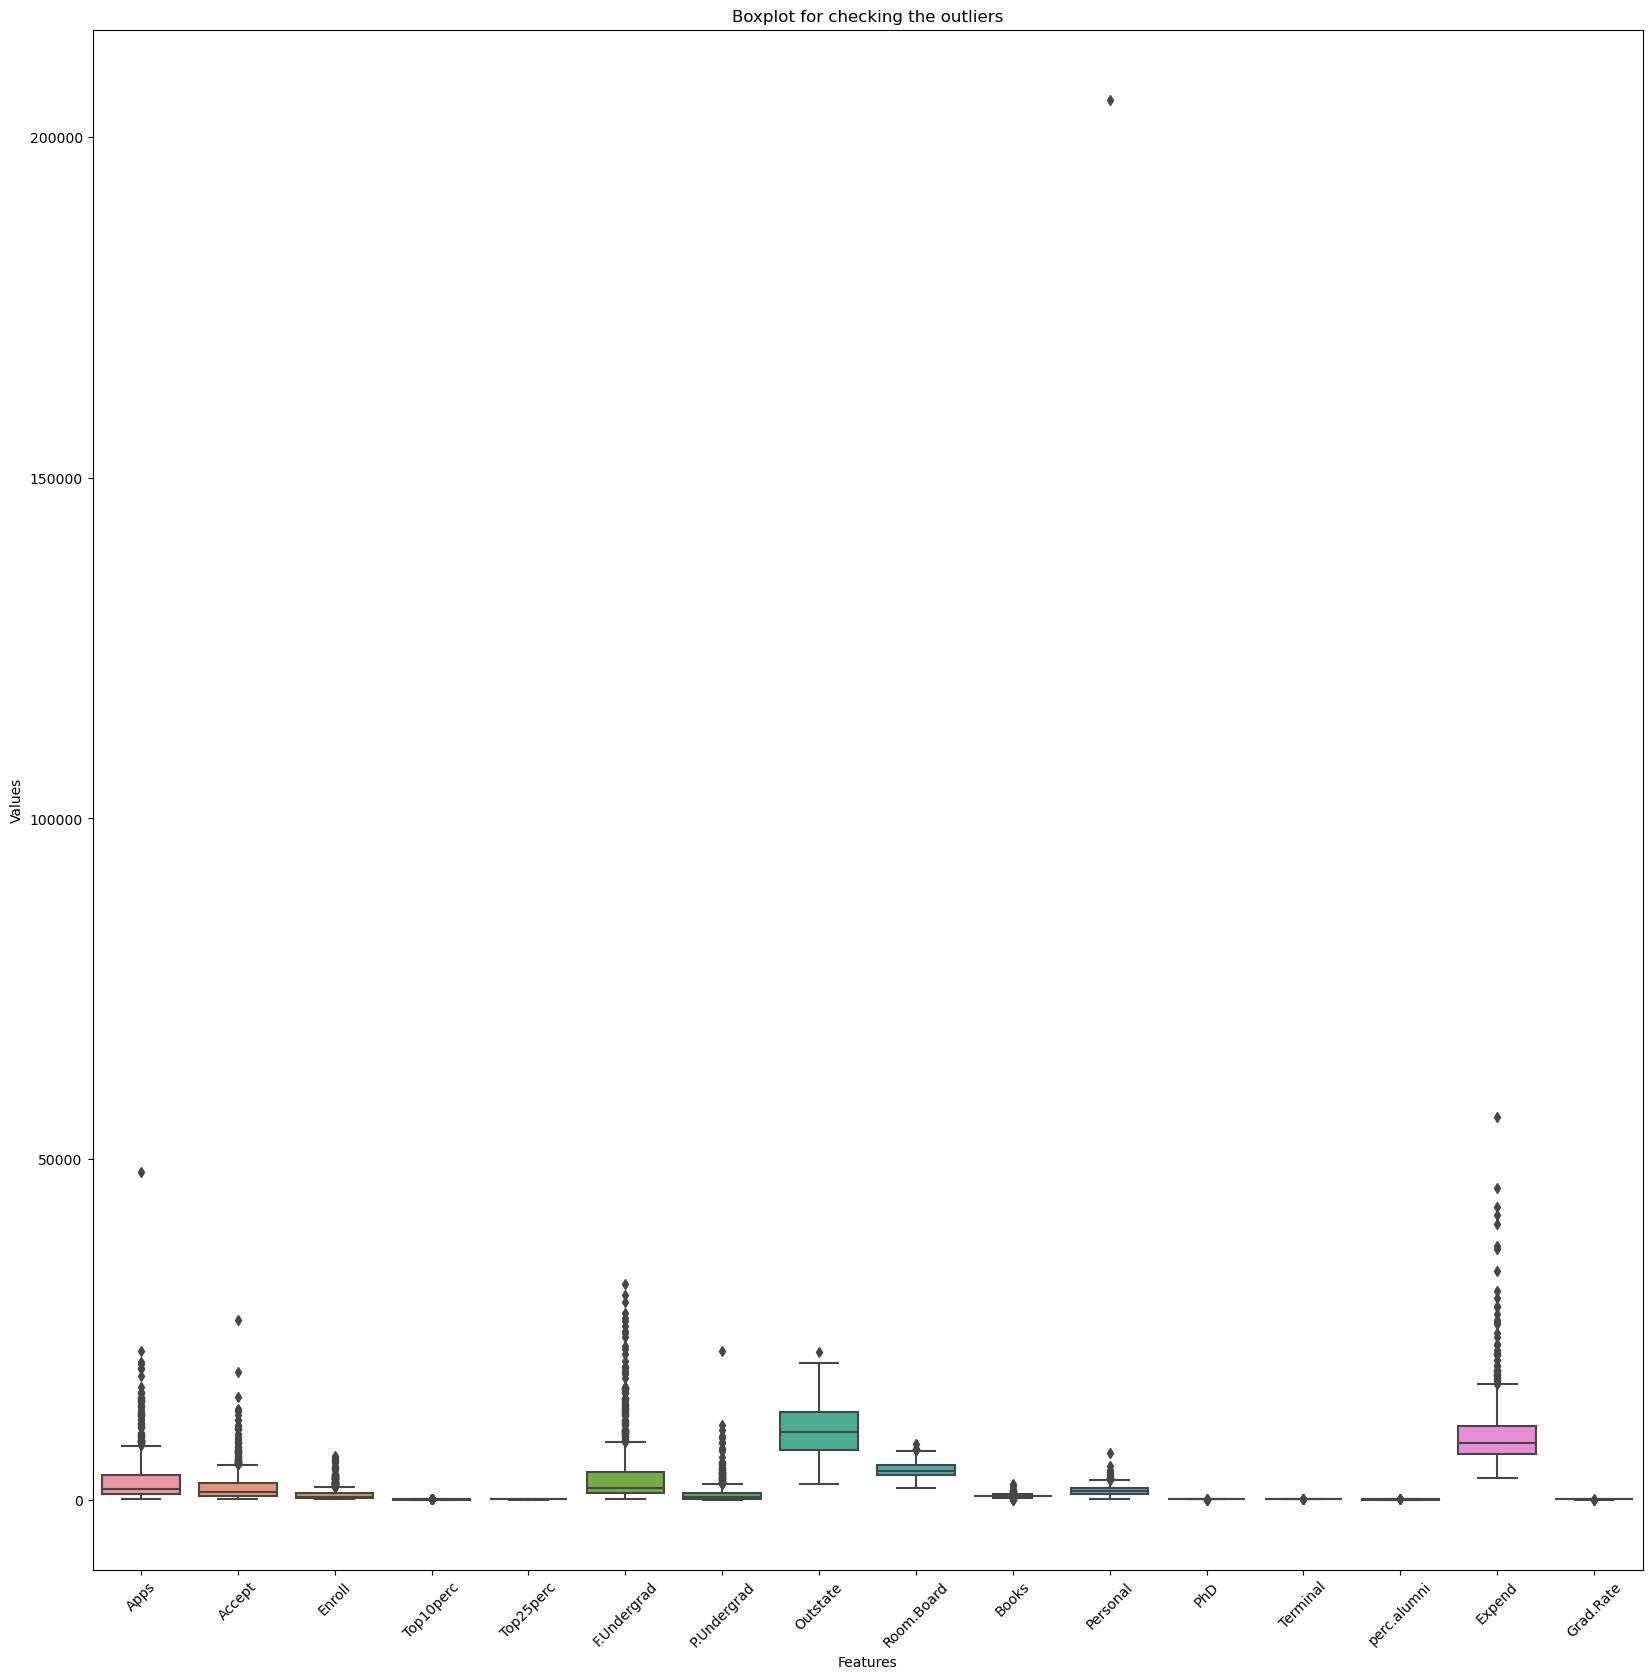

In [66]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)
plt.title('Boxplot for checking the outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

* Since outliers are present in the dataset, so we will be replacing NULL values in Numerical columns with Median.

**Check the anomalies or wrong entries.**

In [67]:
df[df['S.F.Ratio']=="?"]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
1,Adelphi University,2186.0,1924,512.0,16.0,29,2683,1227,12280,6450,750,1500.0,29,30,?,16,10527,56
81,Campbell University,2087.0,1339,NaN,20.0,54,3191,1204,7550,2790,600,500.0,77,77,?,34,3739,63
241,Gwynedd Mercy College,380.0,237,104.0,30.0,56,716,1108,11000,5550,500,500.0,36,41,?,22,7483,96


In [68]:
df['S.F.Ratio']=df['S.F.Ratio'].replace('?', np.nan)

* Converting data type of **S.F.Ratio** from Object type to Float type

In [69]:
def clean_numeric(value):
    try:
        return float(value)
    except ValueError:
        return pd.NA
df['S.F.Ratio'] = df['S.F.Ratio'].apply(clean_numeric)

**Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.**

In [70]:
df[df.isnull().sum(axis=1)>0]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
1,Adelphi University,2186.0,1924,512.0,16.0,29,2683,1227,12280,6450,750,1500.0,29,30,NaN,16,10527,56
3,Agnes Scott College,417.0,349,NaN,60.0,89,510,63,12960,5450,450,875.0,92,97,7.7,37,19016,59
9,Alderson-Broaddus College,NaN,498,172.0,21.0,44,799,78,10468,3380,660,1800.0,40,41,11.5,15,8991,52
41,Bellarmine College,NaN,707,308.0,39.0,63,1198,605,8840,2950,750,1290.0,74,82,13.1,31,6668,84
81,Campbell University,2087.0,1339,NaN,20.0,54,3191,1204,7550,2790,600,500.0,77,77,NaN,34,3739,63
102,Central Connecticut State University,4158.0,2532,902.0,NaN,24,6394,3881,5962,4444,500,985.0,69,73,16.7,4,4900,49
103,Central Missouri State University,4681.0,4101,1436.0,NaN,35,8094,1596,4620,3288,300,2250.0,69,80,19.7,4,5501,50
128,College of Notre Dame,344.0,264,97.0,NaN,42,500,331,12600,5520,630,2250.0,77,80,10.4,7,9773,43
129,College of Notre Dame of Maryland,457.0,356,177.0,NaN,61,667,1983,11180,5620,600,700.0,64,64,11.5,32,7477,75
166,Dillard University,1998.0,1376,651.0,41.0,88,1539,45,6700,3650,500,NaN,52,52,14.1,12,7566,61


In [71]:
median1=df['Apps'].median()
median2=df['Enroll'].median()
median3=df['Top10perc'].median()
median4=df['Personal'].median()
median5=df['S.F.Ratio'].median()

df['Apps'].replace(np.nan,median1,inplace=True)
df['Enroll'].replace(np.nan,median2,inplace=True)
df['Top10perc'].replace(np.nan,median3,inplace=True)
df['Personal'].replace(np.nan,median4,inplace=True)
df['S.F.Ratio'].replace(np.nan,median5,inplace=True)

**Removing Outliers**

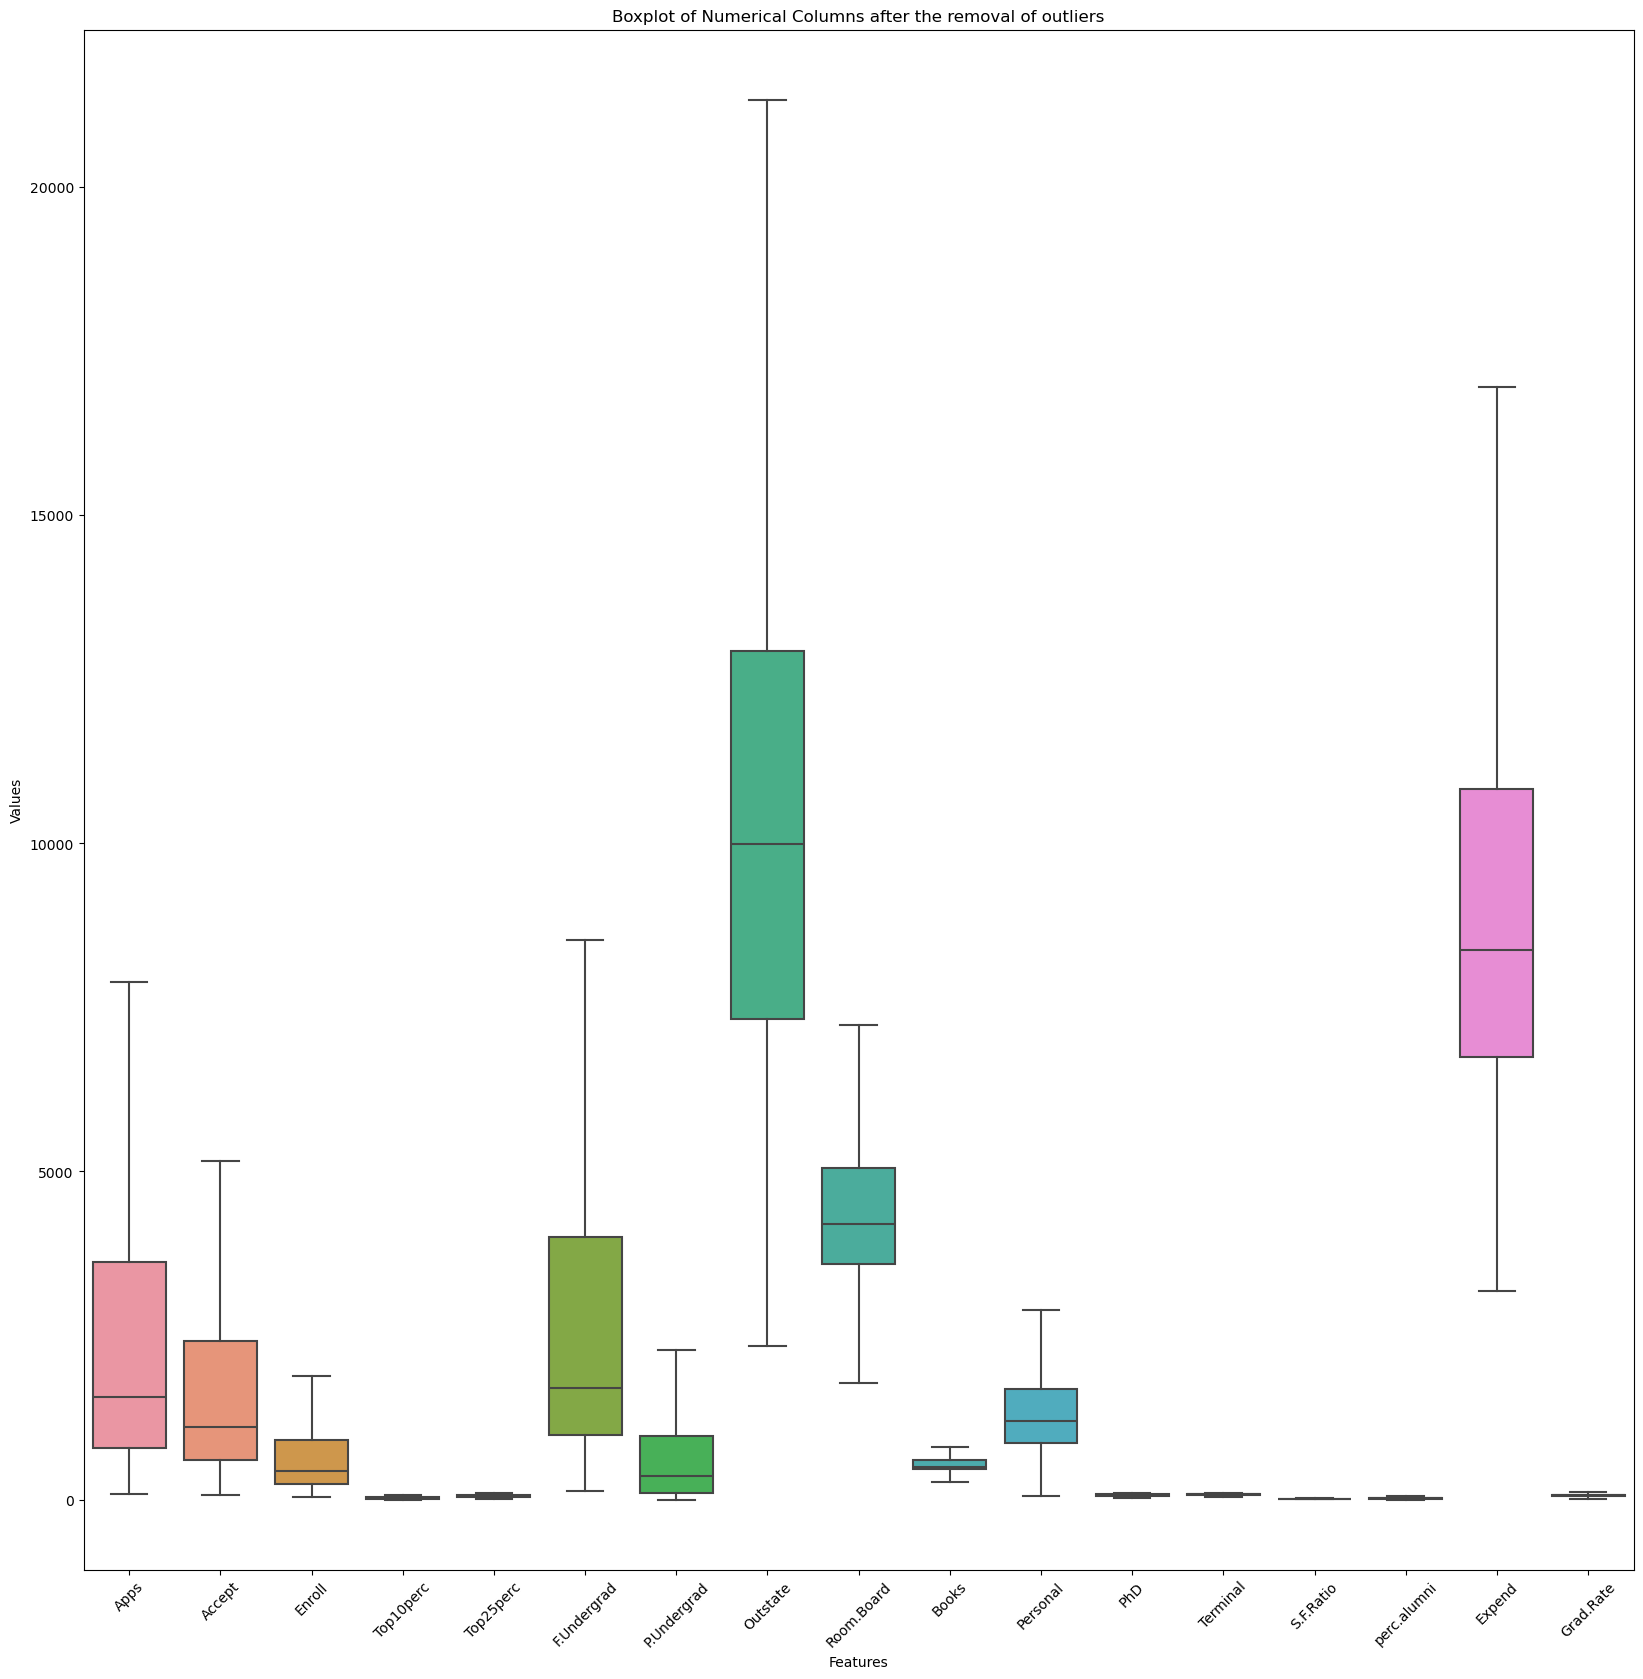

In [72]:
def remove_outlier(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)
    return lower_range, upper_range

for column in df.columns:
    if df[column].dtype != 'object':  # Only process numeric columns
        lr, ur = remove_outlier(df[column])
        df[column] = np.where(df[column] > ur, ur, df[column])
        df[column] = np.where(df[column] < lr, lr, df[column])
        
plt.figure(figsize=(20,20))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Columns after the removal of outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## 1. Application and Enrollment Analysis

**What is the average number of applications received by colleges?**

In [73]:
df['Apps'].mean()

2573.042471042471

**What percentage of applications are accepted on average across all colleges?**

In [74]:
df['Acceptance Rate'] = df['Accept'] / df['Apps'] * 100
average_acceptance_rate = df['Acceptance Rate'].mean()
average_acceptance_rate

74.40919070193466

**What is the average enrollment rate (number of students enrolled divided by number of applications accepted)?**

In [75]:
df['Enrollment Rate'] = df['Enroll'] / df['Accept'] * 100
average_enrollment_rate = df['Enrollment Rate'].mean()
average_enrollment_rate

40.78222021043922

**Which college has the highest number of applications received?**

In [76]:
df.loc[df['Apps'].idxmax(), 'Names']

'Arizona State University Main campus'

## 2. Academic Excellence

**What is the average percentage of new students from the top 10% of their higher secondary class across all colleges?**

In [77]:
df['Top10perc'].mean()

26.88159588159588

**What is the average percentage of new students from the top 25% of their higher secondary class?**

In [78]:
df['Top25perc'].mean()

55.7966537966538

**Is there a correlation between the percentage of students from the top 10% and the top 25% of their higher secondary class?**

In [79]:
corr_perc= df['Top10perc'].corr(df['Top25perc'])
corr_perc

0.9119061816018964

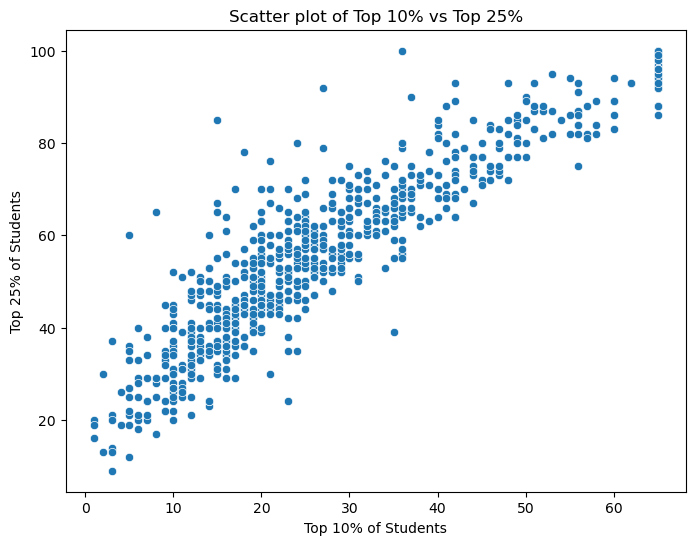

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Top10perc', y='Top25perc', data=df)
plt.title('Scatter plot of Top 10% vs Top 25%')
plt.xlabel('Top 10% of Students')
plt.ylabel('Top 25% of Students')
plt.show()

## 3. Student Demographics

**What is the average number of full-time undergraduate students per college?**

In [81]:
df['F.Undergrad'].mean()

2935.6480051480053

**What is the average number of part-time undergraduate students per college?**

In [82]:
df['P.Undergrad'].mean()

655.8841698841699

**Which college has the highest number of out-of-state students?**

In [83]:
df.loc[df['Outstate'].idxmax(), 'Names']

'Bennington College'

## 4. Cost and Spending

**What is the average cost of room and board across all colleges?**

In [84]:
avg_room_board_cost = df['Room.Board'].mean()
avg_room_board_cost

4355.438223938224

**What is the average estimated book cost for a student?**

In [85]:
avg_books_cost = df['Books'].mean()
avg_books_cost

538.7471042471043

**What is the average estimated personal spending for a student?**

In [86]:
avg_personal_spending = df['Personal'].mean()
avg_personal_spending

1320.065637065637

**How does the instructional expenditure per student vary across colleges?**

C:\Users\kunwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


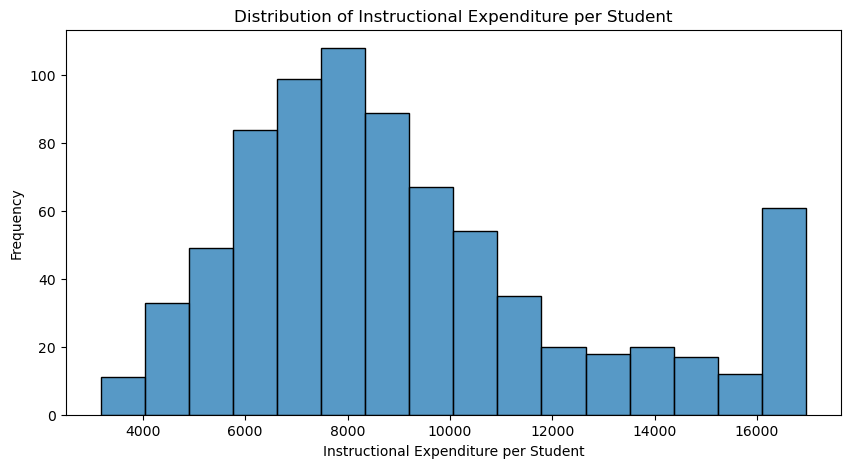

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Expend'])
plt.title('Distribution of Instructional Expenditure per Student')
plt.xlabel('Instructional Expenditure per Student')
plt.ylabel('Frequency')
plt.show()

## 5. Faculty Qualifications

**What is the average percentage of faculties with Ph.D.s across all colleges?**

In [88]:
average_phds = df['PhD'].mean()
average_phds

72.77477477477477

**What is the average percentage of faculties with terminal degrees?**

In [89]:
average_terminal = df['Terminal'].mean()
average_terminal

79.78249678249678

**Is there a correlation between the percentage of faculties with Ph.D.s and the graduation rate?**

In [90]:
df['PhD'].corr(df['Grad.Rate'])


0.31001938561605374

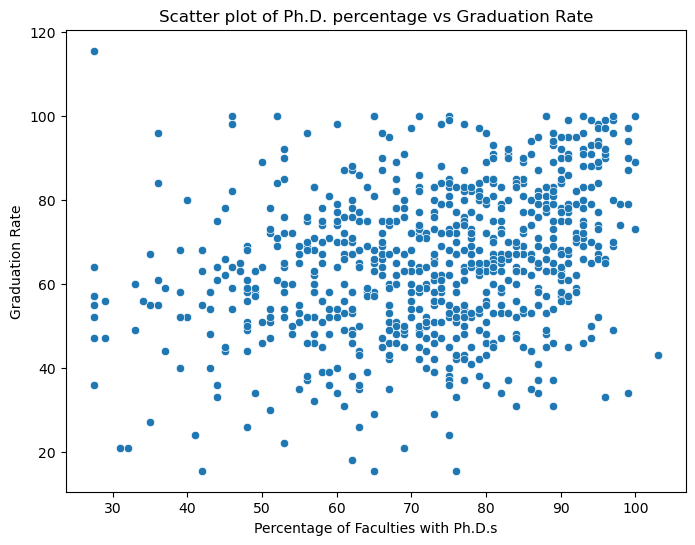

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PhD', y='Grad.Rate', data=df)
plt.title('Scatter plot of Ph.D. percentage vs Graduation Rate')
plt.xlabel('Percentage of Faculties with Ph.D.s')
plt.ylabel('Graduation Rate')
plt.show()

## 6. Student-Faculty Interaction

**What is the average student/faculty ratio across all colleges?**

In [92]:
average_ratio = df['S.F.Ratio'].mean()
average_ratio

14.04993564993565

**Which college has the lowest student/faculty ratio?**

In [93]:
min_ratio_row = df.loc[df['S.F.Ratio'].idxmin()]

college = min_ratio_row['Names']
min_ratio = min_ratio_row['S.F.Ratio']
college

'Case Western Reserve University'

**Is there a correlation between the student/faculty ratio and the graduation rate?**

In [94]:
df['S.F.Ratio'].corr(df['Grad.Rate'])

-0.3062761129938683

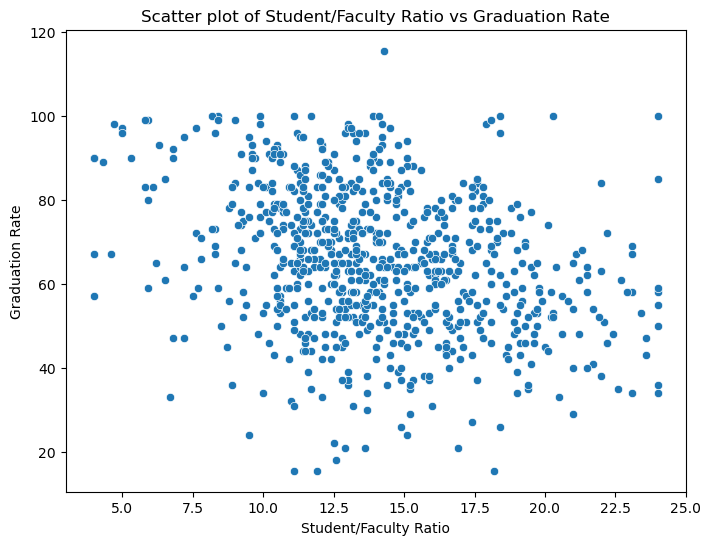

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='S.F.Ratio', y='Grad.Rate', data=df)
plt.title('Scatter plot of Student/Faculty Ratio vs Graduation Rate')
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Graduation Rate')
plt.show()

## 7. Alumni Engagement

**What is the average percentage of alumni who donate across all colleges?**

In [96]:
average_donation_rate = df['perc.alumni'].mean()
average_donation_rate

22.72200772200772

**Is there a correlation between the percentage of alumni who donate and the graduation rate?**

In [97]:
df['perc.alumni'].corr(df['Grad.Rate'])

0.4914075031779878

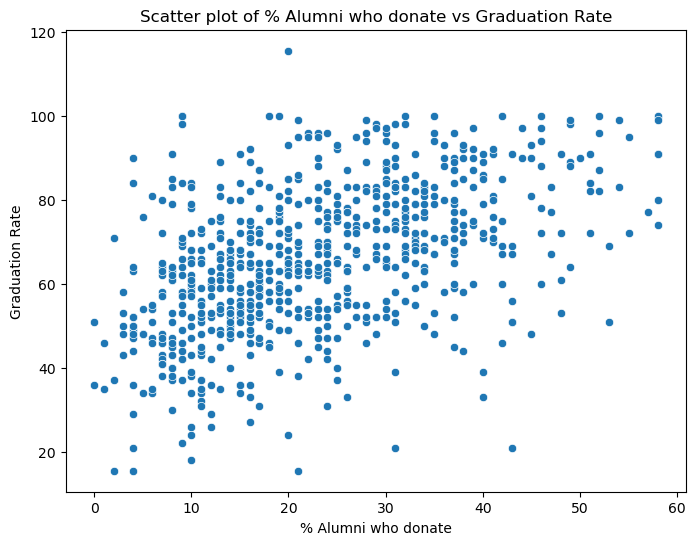

In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='perc.alumni', y='Grad.Rate', data=df)
plt.title('Scatter plot of % Alumni who donate vs Graduation Rate')
plt.xlabel('% Alumni who donate')
plt.ylabel('Graduation Rate')
plt.show()

## 8. Graduation Rates

**What is the average graduation rate across all colleges?**

In [99]:
average_graduation_rate = df['Grad.Rate'].mean()
average_graduation_rate

65.46846846846847

**Which college has the highest graduation rate?**

In [100]:
highest_grad_rate = df.loc[df['Grad.Rate'].idxmax()]

college = highest_grad_rate['Names']
college

'Cazenovia College'

**Is there a correlation between the instructional expenditure per student and the graduation rate?**

In [101]:
df['Expend'].corr(df['Grad.Rate'])

0.4152908577671121

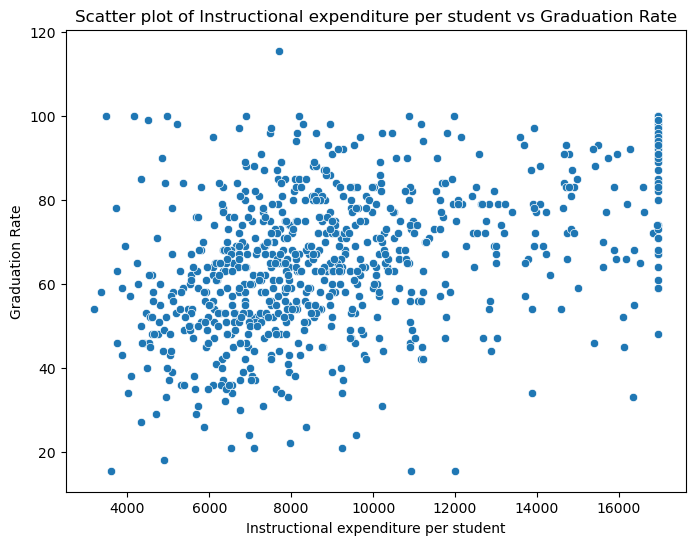

In [102]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Expend', y='Grad.Rate', data=df)
plt.title('Scatter plot of Instructional expenditure per student vs Graduation Rate')
plt.xlabel('Instructional expenditure per student')
plt.ylabel('Graduation Rate')
plt.show()

## 9. Overall Insights

**Which factors (applications, acceptance rate, enrollment, academic excellence, costs, faculty qualifications, student/faculty ratio, alumni donations, expenditures) are most strongly associated with higher graduation rates?**

In [103]:
columns = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad','Outstate', 'Room.Board',
                      'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio','perc.alumni', 'Expend', 'Grad.Rate']
correlation_matrix = df[columns].corr()
grad_rate_correlations = correlation_matrix['Grad.Rate'].sort_values(ascending=False)
grad_rate_correlations

Grad.Rate      1.000000
Outstate       0.572458
perc.alumni    0.491408
Top10perc      0.490772
Top25perc      0.478985
Room.Board     0.425790
Expend         0.415291
PhD            0.310019
Terminal       0.292803
Apps           0.150912
Accept         0.078982
Books         -0.003957
Enroll        -0.023394
F.Undergrad   -0.082239
P.Undergrad   -0.265158
Personal      -0.283462
S.F.Ratio     -0.306276
Name: Grad.Rate, dtype: float64

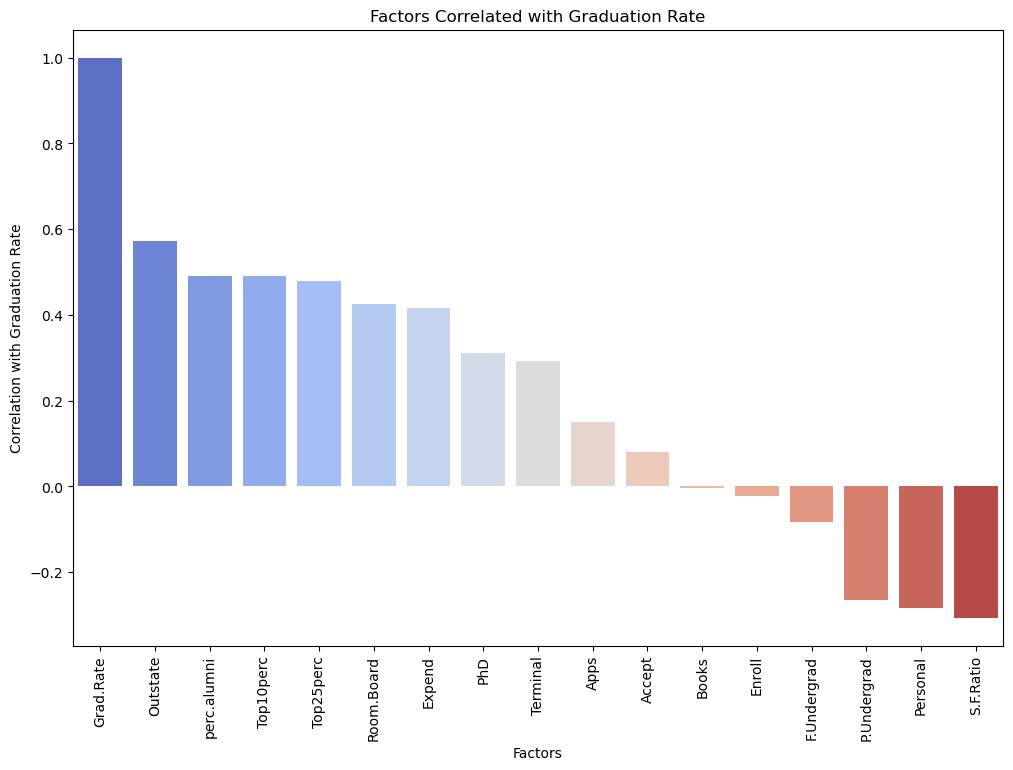

In [104]:
plt.figure(figsize=(12, 8))
sns.barplot(x=grad_rate_correlations.index, y=grad_rate_correlations.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Factors')
plt.ylabel('Correlation with Graduation Rate')
plt.title('Factors Correlated with Graduation Rate')
plt.show()

**What recommendations can be made to colleges to improve their graduation rates based on the data analysis?**

Based on the data analysis and correlation of various factors with graduation rates, the following recommendations can be made to colleges to improve their graduation rates: <br>

**Enhance Academic Excellence:** <br>

* Focus on High Achievers: Encourage enrollment of students from the top 10% and top 25% of their high school class. High academic performers tend to have higher graduation rates. <br>
* Offer Academic Support: Provide tutoring, mentoring, and academic advising to help students succeed in their studies.<br>

**Increase Faculty Qualifications:** <br>

* Hire More Qualified Faculty: Increase the percentage of faculty with Ph.D. degrees and terminal degrees. Higher faculty qualifications are associated with better academic outcomes for students. <br>
* Faculty Development Programs: Invest in professional development for faculty to enhance their teaching skills and keep them updated with the latest educational practices.<br>

**Improve Student-Faculty Ratio:** <br>

* Smaller Class Sizes: Aim to lower the student-faculty ratio. Smaller class sizes allow for more personalized attention and support, which can improve student outcomes. <br>
* Hire More Faculty: Increase the number of full-time faculty members to reduce the student-faculty ratio.<br>

**Increase Instructional Expenditure:** <br>

* Invest in Instructional Resources: Allocate more funds towards instructional expenditure per student. This includes spending on teaching materials, technology, and classroom resources. <br>
* Enhance Learning Environments: Upgrade classrooms, labs, and libraries to create conducive learning environments.<br>

**Support Alumni Engagement:** <br>

* Encourage Alumni Donations: Foster strong relationships with alumni and encourage them to donate. Higher alumni donation rates are positively correlated with graduation rates, possibly due to the improved resources and support they help provide. <br>
* Alumni Mentorship Programs: Develop programs where alumni can mentor current students, providing guidance and support.<br> 

**Improve Enrollment Strategies:** <br>

* Balanced Enrollment: Manage enrollment numbers to ensure that resources are not stretched too thin, which can negatively impact student support and graduation rates. <br>
* Targeted Recruitment: Focus on recruiting students who are a good fit for the college's academic programs and culture.<br>

**Enhance Student Support Services:** <br>

* Comprehensive Support Services: Offer a range of support services, including academic advising, career counseling, mental health services, and financial aid counseling. <br>
* Early Intervention Programs: Implement early warning systems to identify and support at-risk students before they fall behind.<br>

**Improve Cost Management:** <br>

* Affordable Education: Manage costs such as room and board, books, and personal expenses to ensure they are not prohibitive for students. This can reduce financial stress and help students focus on their studies. <br>
* Financial Aid Programs: Expand scholarships, grants, and work-study programs to make college more affordable for students from diverse economic backgrounds.